Since we are considering univariate logistic regression. <br>
We will consider only one feature (sepal length) and a target vector of size 2 (setosa, versicolor)

In [1]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import linear_model

In [2]:
iris = datasets.load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [5]:
X = iris.data[:, 0]

y_bool = iris.target!=2

y = iris.target[y_bool]

X = X[y_bool]

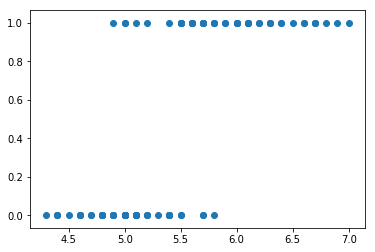

In [6]:
plt.scatter(X,y)
plt.show()

### Logistic Regression

In [7]:
X = np.c_[np.ones((X.shape[0],1)), X[:]]
y = y.reshape(-1,1)


# Parameters required for Gradient Descent
alpha = 0.1   #learning rate
m = y.size  #no. of samples
np.random.seed(10)
theta = np.random.rand(2)  #initializing theta with some random values
theta = theta.reshape(-1,1)

In [8]:
def gradient_descent(x, y, m, theta,  alpha):
    cost_list = []   #to record all cost values to this list
    theta_list = []  #to record all theta_0 and theta_1 values to this list 
    prediction_list = []
    run = True
    cost_list.append(1e10)    #we append some large value (initial value) to the cost list
    i=0
    while run:
        Z = np.dot(x, theta) 
        prediction = 1 / (1 + np.exp(-Z))   #predicted y values - sigmoid function
        prediction_list.append(prediction)
        error = prediction - y
        cost = np.sum(-(y * np.log(prediction) + (1 - y) * np.log(1 - prediction))) / m   #  (1/2m)*sum[(error)^2]
#         cost = -(1/m)*np.sum(np.dot(y.T, np.log(prediction)) + np.dot((1 - y).T, np.log(1 - prediction)))
        
        cost_list.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))   # alpha * (1/m) * sum[error*x]
        theta_list.append(theta)
        if cost_list[i]-cost_list[i+1] < 1e-9:   #checking if the change in cost function is less than 10^(-9)
            run = False

        i+=1
    cost_list.pop(0)   # Remove the large number we added in the begining 
    return prediction_list, cost_list, theta_list

In [9]:
prediction_list, cost_list, theta_list = gradient_descent(X, y, m, theta, alpha)
theta = theta_list[-1]

In [10]:
theta

array([[-27.53475787],
       [  5.08546084]])

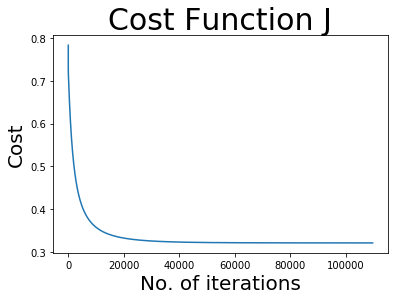

In [11]:
plt.title('Cost Function J', size = 30)
plt.xlabel('No. of iterations', size=20)
plt.ylabel('Cost', size=20)
plt.plot(cost_list)
plt.show()

In [12]:
X_test = np.linspace(4,7,200)

In [13]:
def model(x):
    return 1 / (1 + np.exp(-x))

In [14]:
loss = model(X_test*theta[1] + theta[0])

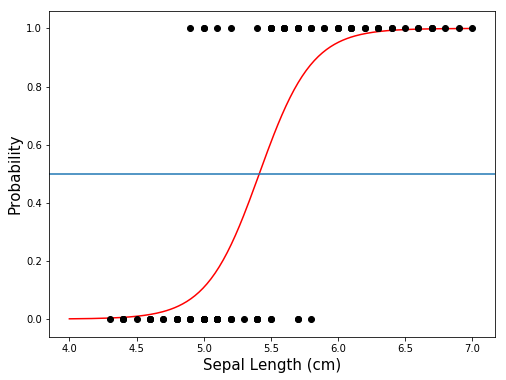

In [15]:
plt.figure(1, figsize=(8, 6))
plt.clf()
plt.plot(X_test, loss,color='red')
plt.scatter(X[:,1], y, color='black', zorder=20)
# plt.scatter(X.ravel(), y, color='black', zorder=20)
# plt.plot(X_test, '.')
plt.axhline(0.5)
plt.xlabel('Sepal Length (cm)', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.show()

### Prediction

In [16]:
def logistic_binary(x):
    if model(x*theta[1]+theta[0])<0.5:
        return iris.target_names[0]
    else:
        return iris.target_names[1]

In [17]:
logistic_binary(4)

'setosa'

In [18]:
logistic_binary(6.5)

'versicolor'

### scikit learn

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression(C=1e100)

In [21]:
X[:,1].shape, y.shape

((100,), (100, 1))

In [22]:
lr = lr.fit(X[:,1].reshape(-1,1),y.ravel())

#### From sci-kit learn

In [23]:
'Theta_0 and Theta_1 are {},{}'.format(lr.intercept_[0], lr.coef_[0,0])

'Theta_0 and Theta_1 are -27.830580092838964,5.140174923967428'

#### From scratch

In [24]:
'Theta_0 and Theta_1 are {},{}'.format(theta[0,0], theta[1,0])

'Theta_0 and Theta_1 are -27.534757871504066,5.085460835465244'